In [9]:
import numpy as np
import kf_book.book_plots as book_plots
from kf_book.book_plots import figsize, set_figsize
import matplotlib.pyplot as plt

### lets try and recreate the example in the book of a dog moving between doors but instead we will change it to a cat moving between laps
# change it a bit by adding more spaces / laps
n_spots = 20
laps = 5

# cat is on a track betwen laps, randomly assign laps to spots to mix it up
cat_track = np.concatenate((np.array([0] * (n_spots - laps)), np.array([1] * laps)))
np.random.shuffle(cat_track)
cat_track

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [3]:
# initially we have no idea where the cat is so set our belief to uniform
belief = np.array([1/n_spots]*n_spots)
belief

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

belief: [0.00027322 0.00027322 0.19918033 0.19918033 0.19918033 0.00027322
 0.00027322 0.00027322 0.00027322 0.00027322 0.00027322 0.00027322
 0.00027322 0.00027322 0.19918033 0.00027322 0.00027322 0.19918033
 0.00027322 0.00027322]
sum = 1.0000000000000004


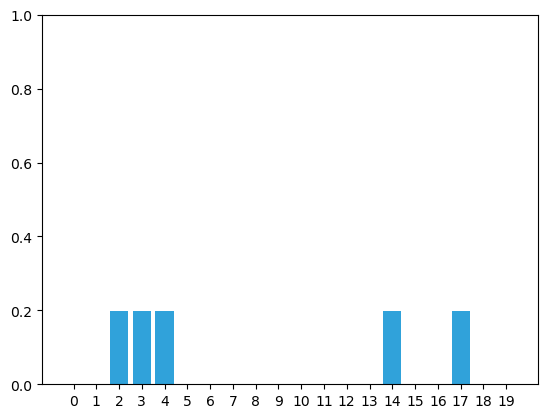

In [19]:
## this is our function for our human sensor readings, we survey our humans to see if the cat is in their lap
## but humans aren't always reliable sensors

## lets assume that they are 4x more likely to be right than wrong
def update_belief(track, belief, z, z_prob):
    # track: the track the cat is on
    # belief: the current belief of where the cat is
    # z: the sensor reading
    # z_prob: prob sensor is correct, used to calculate scale
    
    scale = z_prob / (1 - z_prob)

    ## see book code for optimized faster numpy version, leaving as loop to be explicit
    for i, val in enumerate(track): 
        if val == z:
            # if we see the cat location = the sensor reading of "lap", increase our belief in that spot
            belief[i] *= scale
        ## this is our likelihood function, how likely is each position given our measurment
    return belief


## as shown below we increase our belief in the locations where we read a "lap"
## this is our likelihood
new_belief = update_belief(cat_track, belief, z=1, z_prob=.75)
## likelihood not a prob dist so we normalize to get one
new_belief = new_belief / sum(belief)
print('belief:', new_belief)
print('sum =', sum(new_belief))
plt.figure()
book_plots.bar_plot(new_belief)


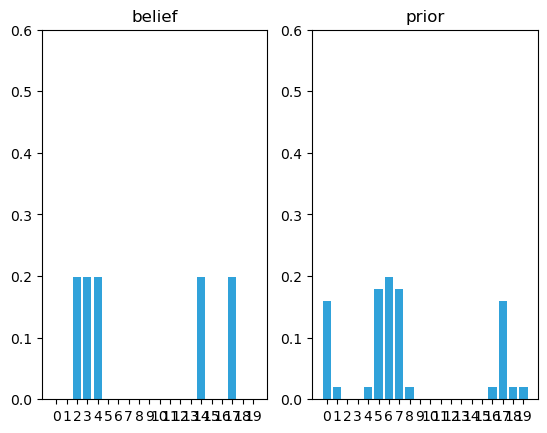

In [26]:
### lets predict movement of cat now
## skipping to convolution part

## filterpy has convolve built in predict function but do it here for explicit


def predict_move_convolution(pdf, offset, kernel):
    N = len(pdf)
    kN = len(kernel)
    width = int((kN - 1) / 2) ## 

    prior = np.zeros(N)
    for i in range(N):
        for k in range (kN):
            index = (i + (width-k) - offset) % N
            prior[i] += pdf[index] * kernel[k]
    return prior

prior = predict_move_convolution(new_belief, offset=3, kernel=[.1, .8, .1])
book_plots.plot_belief_vs_prior(new_belief, prior, ylim=(0,0.6)) 
# belief == likelihood of cat location given data at start
# offset is steps we predict the cat to have moved, we shift the pdf of our belief by how far we think it moved
# then we convolve with the kernel representing our uncertainty in the measurment of movement
# we then end up with a prediction of cat's location which he calls a prior since it is now 
# fed back into the update step



### need to finish up to have a true update / predict flow here but running out of time before bed

In [24]:
sum(belief)

183.0